## Esercitazione 6 - 25 Marzo 2024

Scrivere le funzioni python `bisezione.py`, `falsi.py`,  che implementino rispettivamente il metodo di bisezione, di falsa posizione, delle corde, delle secanti e di Newton.

Le funzioni `bisezione.py`, `falsi.py` devono assumere come input:

-  gli estremi dell'intervallo [a,b], dominio di f.
-  il nome `fname` della funzione di cui calcolare lo zero
-  tolx: tolleranza per il testi di arresto per l'errore relativo tra due iterati successivi
-  tolf: tolleranza per il test di arresto sul valore della funzione
-  nmax= numero massimo di iterazioni
    
In output:
-      lo zero della funzione
-      il numero di iterazioni effettuate
-      una lista contenente tutti gli iterati xk



**Sperimentazione numerica**

## Esercizio 1 

 Confrontare i metodi sopra implementati nei casi seguenti:
- f(x) = $x^3-6x^2-4x+24$ in [-3,8], tolx = 1.e − 12, tolf = 1.e − 12, (soluzione esatta alfa=-2,2,6);
- f(x) = exp(−x) − (x + 1) in [−1, 2]  tolx = 1.e − 12, tolf = 1.e − 12, (soluzione esatta alfa=0);
- f(x) = log2(x + 3) − 2 in [−1, 2]  tolx = 1.e − 12, tolf = 1.e − 12, (soluzione esatta alfa=1);
- f(x) =sqrt(x)-(x^2)/4 in [1, 3]  tolx = 1.e − 12, tolf =1.e − 12, (soluzione esatta alfa=2**(4/3))

Mostrare in un grafico in scala semilogaritmica sulle ordinate (comando semilogy) l’andamento di ek = |xk − α|, k = 1, ..., nit, sapendo che α = 0, 1, 2**(4/3) nei casi 2-4.


In [1]:
import math

def sign(x):
    return math.copysign(1,x)

In [2]:
def metodo_bisezione(fname,a,b,tolx):
    fa=fname(a)
    fb=fname(b)
    if sign(fa*fb)>=0:
        print("Impossibile applicre il metodo di bisezione")
        return None,None,None
    it=0
    v_xk=[]

    #andiamo avanti finché non localizziamo l'intervallino che contiene la nostra soluzione
    while abs(b-a)>tolx:
        xk=a+(b-a)/2
        v_xk.append(xk)
        it+=1
        fxk=fname(xk)
        if fxk==0:
            return xk,it,v_xk
        if sign(fa*fxk)<0:
            b=xk
            fb=fxk
        elif sign(fxk*fb)<0:
            a=xk
            fa=fxk
    return xk,it,v_xk
        

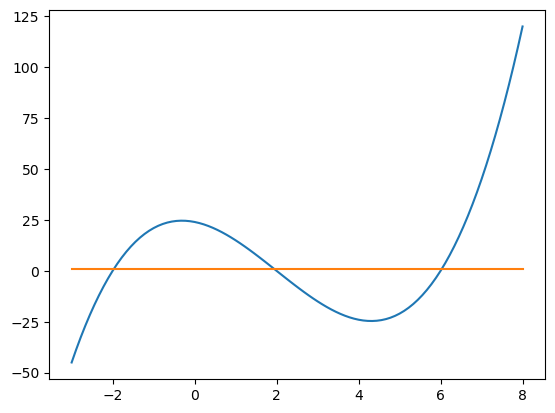

In [63]:
import numpy as np
import matplotlib.pyplot as plt

f1= lambda x:x**3-6*x**2-4*x+24
x=np.linspace(-3.0,8.0,100)
plt.plot(x,f1(x),x,np.ones_like(x))

In [64]:
def find_and_plot_solution(a,b,exact,f):
    a1=a
    b1=b
    tolx=1e-12
    xk,it,v_xk=metodo_bisezione(f,a1,b1,tolx)
    print("Soluzione di bisezione",xk,"Numero di iterazioni -->",it)
    alpha=exact #Soluzione esatta
    ek=np.abs(np.array(v_xk)-alpha) #errore assoluto
    plt.semilogy(np.arange(it),ek,'ro')

Soluzione di bisezione -2.0000000000004095 Numero di iterazioni --> 43


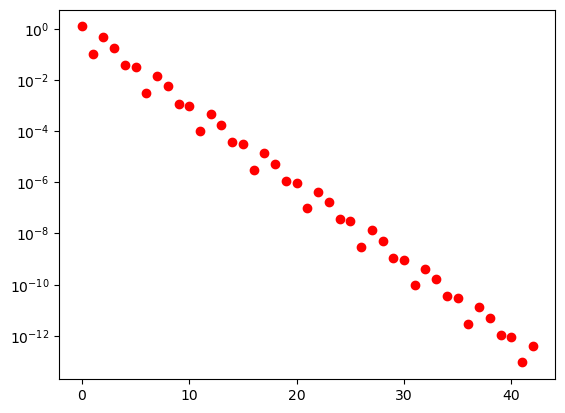

In [65]:
find_and_plot_solution(-3.0,1.4,-2.0,f1)

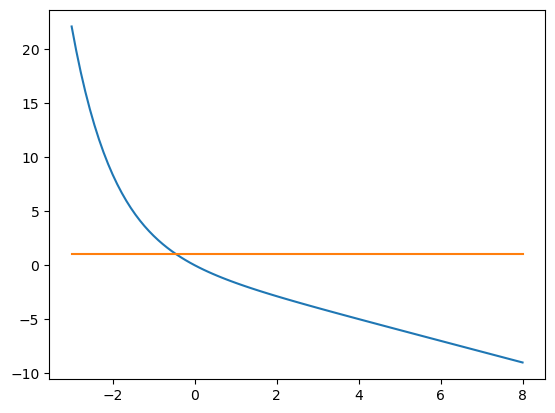

In [66]:
f2=lambda x:-(x+1)+math.exp(1)**(-x)
x=np.linspace(-3.0,8.0,100)
plt.plot(x,f2(x),x,np.ones_like(x))

## Metodo di regula falsi

Implementazione del metodo di regula falsi per trovare una soluzione all'equazione

In [69]:
def regula_falsi(fname,a,b,tolx,tolf,maxit):
    fa=fname(a)
    fb=fname(b)
    if sign(fa*fb)>=0:
        print("Impossibile applicre il metodo di bisezione")
        return None,None,None
    it=0
    v_xk=[]

    errorex=1+tolx
    fxk=1+tolf
    xprec=a
    
    while it<maxit and abs(fxk)>tolf and errorex>tolx:
        xk=a-fa*(b-a)/(fb-fa)
        v_xk.append(xk)
        it+=1
        fxk=fname(xk)
        if fxk==0:
            return xk,it,v_xk
        if sign(fa*fxk)<0:
            b=xk
            fb=fxk
        elif sign(fxk*fb)<0:
            a=xk
            fa=fxk
        if xk!=0:
            errorex= np.abs(xk-xprec)/abs(xk)
        else:
            errorex= np.abs(xk-xprec)
    xprec=xk
    return xk,it,v_xk

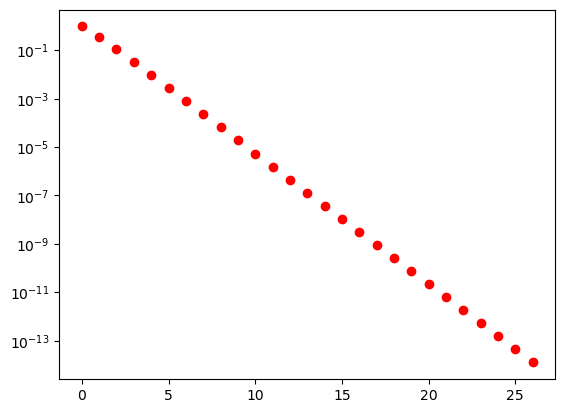

In [75]:
alpha=-2.0
tolf=1e-12
tolx=1e-12
maxit=100
a1=-3.0
b1=0.0
xk_fal,it_fal,v_xk_fal= regula_falsi(f1,a1,b1,tolx,tolf,maxit)
ek_fal=np.abs(np.array(v_xk_fal)-alpha)
plt.semilogy(np.arange(it_fal),ek_fal,'ro')


## Esercizio 2

- Utilizzare il metodo di bisezione per calcolare la radice quadrata di 2. Analizzate i risultati.

Trovare equazione non lineare la cui soluzione è radice di 2

## Esercizio 3
Scrivere una funzione numpy che calcola la norma infinito e la norma 1 di un vettore ed una matrice  e testarla su vettori e matrici  a propria scelta. Confrontarne i risultati con quelli ottenuti utilizzando la funzione norm di numpy.linalg

(Ricorda la formula della norma infinito e della norma 1 di una matrice
$||A||_\infty= \max_{j=1,n} \sum_{i} |a_{ij}| $
$\quad ||A||_1= \max_{i=1,n} \sum_{j} |a_{ij}| $)

In [80]:
def norma1(A):
    #axis = 0 indica la direzione verticale
    c=np.sum(np.abs(A),axis=0)
    n1 = np.max(c)
    return n1

In [81]:
A=np.array([[3.0,7,8],[-2,-4,5],[1,-3,4]])
print(A)

[[ 3.  7.  8.]
 [-2. -4.  5.]
 [ 1. -3.  4.]]


In [82]:
n1=norma1(A)
print(n1)

17.0


In [84]:
import numpy.linalg as npl

norma1=npl.norm(A,1)
print("Norma fatta con numpy -->", norma1)

Norma fatta con numpy --> 17.0


In [85]:
def norma_infinito(A):
    c=np.sum(np.abs(A),axis=1)
    ninf=np.max(c)
    return ninf

In [87]:
B=np.array([[3,7,8],[-15,5,8],[1,-3,4]])
print(B)

[[  3   7   8]
 [-15   5   8]
 [  1  -3   4]]


In [95]:
normainf=norma_infinito(B)
print("Norma infinito a mano -->",normainf)
normainf=npl.norm(B,np.inf)
print("Norma infinito con numpy -->", normainf)

Norma infinito a mano --> 28
Norma infinito con numpy --> 28.0


## Esercizio 4
Implementare una funzione che calcola la norma 2 di una  matrice facendo uso della funzione eigvals del pacchetto numpy.linalg, (np.linalg.eigvals(A)). Testarla sulla matrice A=np.array([[4,-1,6],[2,3,-3],[1,-2,9/2]])   e confrontarne i risultati con quelli ottenuti utilizzando la funzione norm di numpy.linalg